In [1]:
import torch
print(torch.cuda.is_available())
torch.__version__

True


'2.4.1+cu121'

In [2]:
# understanding tensors

In [3]:
# 1 creating pytorch tensors

tensor0d = torch.tensor(4)
tensor0d

tensor(4)

In [5]:
tensor1d = torch.tensor([1,2,3])
tensor1d

tensor([1, 2, 3])

In [6]:
tensor2d = torch.tensor([[1,2,3],[4,5,6]])
tensor2d

tensor([[1, 2, 3],
        [4, 5, 6]])

In [7]:
tensor3d = torch.tensor([[[1,2,3],[4,5,6],[7,8,9]]])
tensor3d

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])

In [8]:
tensor3d.shape

torch.Size([1, 3, 3])

In [9]:
tensor3d.dtype

torch.int64

In [10]:
floatvec = torch.tensor([1.0,2.0,3.0])
floatvec

tensor([1., 2., 3.])

In [11]:
floatvec.dtype

torch.float32

In [12]:
floatvec = tensor1d.to(torch.float32)
floatvec.dtype

torch.float32

In [13]:
# common operations on tensors

In [14]:
tensor2d = torch.tensor([[1,2,3],[4,5,6]])
tensor2d

tensor([[1, 2, 3],
        [4, 5, 6]])

In [15]:
tensor2d.shape

torch.Size([2, 3])

In [16]:
print(tensor2d.reshape(3,2))

tensor([[1, 2],
        [3, 4],
        [5, 6]])


In [17]:
print(tensor2d.view(3,2))

tensor([[1, 2],
        [3, 4],
        [5, 6]])


In [18]:
print(tensor2d.T)

tensor([[1, 4],
        [2, 5],
        [3, 6]])


In [19]:
tensor2d.matmul(tensor2d.T)

tensor([[14, 32],
        [32, 77]])

In [20]:
tensor2d @ tensor2d.T

tensor([[14, 32],
        [32, 77]])

In [21]:
# model as computation graphs

In [22]:
import torch.nn.functional as F

y = torch.tensor([1.0])
x1 = torch.tensor([1.1])
w1 = torch.tensor([2.2])
b = torch.tensor([0.0])
z = x1 * w1 + b
z


tensor([2.4200])

In [23]:
a = torch.sigmoid(z)
a

tensor([0.9183])

In [24]:
loss = F.binary_cross_entropy(a,y)
loss

tensor(0.0852)

In [25]:
import torch
import torch.nn.functional as F
import math

# Given values
y = torch.tensor([1.0])
x1 = torch.tensor([1.1])
w1 = torch.tensor([2.2])
b = torch.tensor([0.0])

# Calculate z
z = x1 * w1 + b
print(f"z = {x1.item()} * {w1.item()} + {b.item()} = {z.item()}")

# Calculate a (sigmoid of z)
a = torch.sigmoid(z)
print(f"a = sigmoid({z.item()}) = {a.item()}")

# Manual sigmoid calculation for verification
manual_sigmoid = 1 / (1 + math.exp(-z.item()))
print(f"Manual sigmoid calculation: {manual_sigmoid}")

# Calculate loss
loss = F.binary_cross_entropy(a, y)
print(f"loss = -[{y.item()} * log({a.item()}) + (1-{y.item()}) * log(1-{a.item()})] = {loss.item()}")

# Manual loss calculation for verification
manual_loss = -(y.item() * math.log(a.item()) + (1 - y.item()) * math.log(1 - a.item()))
print(f"Manual loss calculation: {manual_loss}")

z = 1.100000023841858 * 2.200000047683716 + 0.0 = 2.4200000762939453
a = sigmoid(2.4200000762939453) = 0.918339729309082
Manual sigmoid calculation: 0.91833975025983
loss = -[1.0 * log(0.918339729309082) + (1-1.0) * log(1-0.918339729309082)] = 0.0851878821849823
Manual loss calculation: 0.08518788132260513


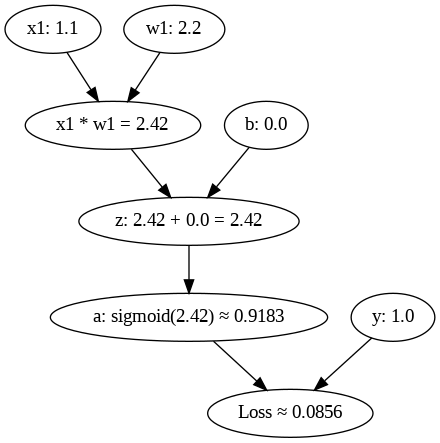

In [36]:
from graphviz import Digraph
from IPython.display import Image

def create_ml_diagram(nodes, edges, rankdir='TD', format='png'):
    dot = Digraph(comment='Machine Learning Diagram')
    dot.attr(rankdir=rankdir)

    # Add nodes
    for node_id, node_label in nodes.items():
        dot.node(node_id, node_label)

    # Add edges
    for edge in edges:
        dot.edge(*edge)

    # Render and display the diagram
    img_name = 'ml_diagram'
    dot.render(img_name, format=format, cleanup=True)
    return Image(f'{img_name}.{format}')

# Example usage for logistic regression
nodes = {
    'X1': 'x1: 1.1',
    'W1': 'w1: 2.2',
    'MUL': 'x1 * w1 = 2.42',
    'B': 'b: 0.0',
    'ADD': 'z: 2.42 + 0.0 = 2.42',
    'SIGMOID': 'a: sigmoid(2.42) ≈ 0.9183',
    'Y': 'y: 1.0',
    'BCE': 'Loss ≈ 0.0856'
}

edges = [
    ('X1', 'MUL'), ('W1', 'MUL'), ('MUL', 'ADD'),
    ('B', 'ADD'), ('ADD', 'SIGMOID'), ('SIGMOID', 'BCE'),
    ('Y', 'BCE')
]

# Create and display the diagram
logistic_regression_diagram = create_ml_diagram(nodes, edges)
display(logistic_regression_diagram)



In [37]:
# automatic differential

In [40]:
import torch.nn.functional as F
from torch.autograd import grad

y = torch.tensor([1.0])
x1 = torch.tensor([1.1])
w1 = torch.tensor([2.2], requires_grad=True)
b = torch.tensor([0.0], requires_grad=True)

z = x1 * w1 + b
a = torch.sigmoid(z)
loss = F.binary_cross_entropy(a, y)


In [43]:
grad_L_w1 = grad(loss, w1, retain_graph=True)
grad_L_b = grad(loss, b, retain_graph=True)

In [44]:
print(grad_L_w1)
print(grad_L_b)

(tensor([-0.0898]),)
(tensor([-0.0817]),)


In [45]:
loss.backward()
print(w1.grad)
print(b.grad)

tensor([-0.0898])
tensor([-0.0817])


In [46]:
# implementing multilayer neural networks

In [48]:
class NeuralNetwork(torch.nn.Module):
    def __init__(self,num_inputs,num_outputs):
        super().__init__()

        self.layers = torch.nn.Sequential(
            # 1st hidden layer
            torch.nn.Linear(num_inputs,30),
            torch.nn.ReLU(),
            # 2nd hidden layer
            torch.nn.Linear(30,20),
            torch.nn.ReLU(),
            # output layer
            torch.nn.Linear(20,num_outputs)
        )

    def forward(self,x):
        logits = self.layers(x)
        return logits


In [49]:
model = NeuralNetwork(50,3)

In [50]:
print(model)

NeuralNetwork(
  (layers): Sequential(
    (0): Linear(in_features=50, out_features=30, bias=True)
    (1): ReLU()
    (2): Linear(in_features=30, out_features=20, bias=True)
    (3): ReLU()
    (4): Linear(in_features=20, out_features=3, bias=True)
  )
)


In [51]:
num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print("Total number of trainable model parameters:", num_params)

Total number of trainable model parameters: 2213


In [56]:
torch.manual_seed(123)
X = torch.rand((1, 50))
out = model(X)
print(out)

tensor([[-0.0696,  0.1813,  0.0329]], grad_fn=<AddmmBackward0>)


In [57]:
with torch.no_grad():
    prediction = model(X)
print(prediction)

tensor([[-0.0696,  0.1813,  0.0329]])


In [60]:
with torch.no_grad():
    prediction_class = torch.softmax(model(X),dim=1)
    print(prediction_class) # class membership probs

tensor([[0.2947, 0.3788, 0.3265]])


In [61]:
# setting up dataloaders


In [63]:
# toy data set
X_train = torch.tensor([
    [-1.2, 3.1],
    [-0.9, 2.9],
    [-0.5, 2.6],
    [2.3, -1.1],
    [2.7, -1.5]
])
y_train = torch.tensor([0, 0, 0, 1, 1])

X_test = torch.tensor([
    [-0.8, 2.8],
    [2.6, -1.6],
])
y_test = torch.tensor([0, 1])

In [66]:
# dataset class
from torch.utils.data import Dataset

class ToyDataset(Dataset):
    def __init__(self,X,y):
        self.features = X
        self.labels = y

    def __getitem__(self, index):
        one_x = self.features[index]
        one_y = self.labels[index]
        return one_x, one_y

    def __len__(self):
        return self.labels.shape[0]

train_ds = ToyDataset(X_train,y_train)
test_ds = ToyDataset(X_test,y_test)

In [67]:
print(len(train_ds))
print(len(test_ds))

5
2


In [68]:
# dataloader class
from torch.utils.data import DataLoader

torch.manual_seed(123)

train_loader = DataLoader(
    dataset = train_ds,
    batch_size=2,
    shuffle=True,
    num_workers=0
)

test_loader = DataLoader(
    dataset = test_ds,
    batch_size=2,
    shuffle=False,
    num_workers=0
)


In [69]:
for idx, (x,y) in enumerate(train_loader):
    print(f"Batch {idx+1}:", x, y)

Batch 1: tensor([[ 2.3000, -1.1000],
        [-0.9000,  2.9000]]) tensor([1, 0])
Batch 2: tensor([[-1.2000,  3.1000],
        [-0.5000,  2.6000]]) tensor([0, 0])
Batch 3: tensor([[ 2.7000, -1.5000]]) tensor([1])


In [70]:

train_loader = DataLoader(
    dataset = train_ds,
    batch_size=2,
    shuffle=True,
    num_workers=0,
    drop_last=True
)

for idx, (x, y) in enumerate(train_loader):
    print(f"Batch {idx+1}:", x, y)



Batch 1: tensor([[-1.2000,  3.1000],
        [-0.5000,  2.6000]]) tensor([0, 0])
Batch 2: tensor([[ 2.3000, -1.1000],
        [-0.9000,  2.9000]]) tensor([1, 0])


In [71]:
# num workers set up a bottleneck, not to use on notebook num_workers = 4


In [73]:
# typical training loop in Pytorch
import torch.nn.functional as F

torch.manual_seed(123)

model = NeuralNetwork(num_inputs=2,num_outputs=2)
optimizer = torch.optim.SGD(model.parameters(),lr=0.5) # stochastic gradient descent

num_epochs = 3

for epoch in range(num_epochs):

    model.train()

    for batch_idx, (features, labels) in enumerate(train_loader):
        logits = model(features)

        loss = F.cross_entropy(logits,labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        print(f"Epoch: {epoch+1:03d}/{num_epochs:03d}"
              f" | Batch {batch_idx:03d}/{len(train_loader):03d}"
              f" | Train Loss: {loss:.2f}")

        model.eval()

Epoch: 001/003 | Batch 000/002 | Train Loss: 0.75
Epoch: 001/003 | Batch 001/002 | Train Loss: 0.65
Epoch: 002/003 | Batch 000/002 | Train Loss: 0.44
Epoch: 002/003 | Batch 001/002 | Train Loss: 0.13
Epoch: 003/003 | Batch 000/002 | Train Loss: 0.03
Epoch: 003/003 | Batch 001/002 | Train Loss: 0.00


In [74]:
model.eval()
with torch.no_grad():
    outputs = model(X_train)

print(outputs)

tensor([[ 2.8569, -4.1618],
        [ 2.5382, -3.7548],
        [ 2.0944, -3.1820],
        [-1.4814,  1.4816],
        [-1.7176,  1.7342]])


In [75]:
torch.set_printoptions(sci_mode=False)
probas = torch.softmax(outputs, dim=1)
print(probas)

tensor([[    0.9991,     0.0009],
        [    0.9982,     0.0018],
        [    0.9949,     0.0051],
        [    0.0491,     0.9509],
        [    0.0307,     0.9693]])


In [76]:
predictions = torch.argmax(probas, dim=1)
print(predictions)

tensor([0, 0, 0, 1, 1])


In [78]:

predictions = torch.argmax(outputs, dim=1)
print(predictions)

tensor([0, 0, 0, 1, 1])


In [79]:
torch.sum(predictions == y_train) # total number correct

tensor(5)

In [80]:
# function to compute the prediction accuracy

def compute_accuracy(model, dataloader):
    model.eval()
    correct = 0.0
    total_examples = 0

    for idx,(features,labels) in enumerate(dataloader):
        with torch.no_grad():
            outputs = model(features)

        predictions = torch.argmax(outputs, dim=1)
        correct += torch.sum(predictions == labels)
        total_examples += labels.shape[0]

    accuracy = correct / total_examples
    return accuracy

In [81]:
print(compute_accuracy(model, train_loader))

tensor(1.)


In [82]:
print(compute_accuracy(model, test_loader))

tensor(1.)


In [83]:
# saving and loading
torch.save(model.state_dict(), "model_weights.pth")

In [84]:
model = NeuralNetwork(num_inputs=2,num_outputs=2)
model.load_state_dict(torch.load("model_weights.pth"))


<ipython-input-84-717c001bf5de>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("model_weights.pth"))


<All keys matched successfully>